# 뷰

* 데이터베이스 개체 중 하나, 가상의 테이블 개념
* 모든 데이터베이스 개체는 테이블과 관련이 있지만, 특히 뷰는 테이블에 직접 접근하므로 밀접하게 연관되어 있다.
* 사용자에게 테이블의 필요한 내용만 보이도록 할 수 있음
* 테이블처럼 데이터를 가지고 있지는 않음
* **단순 뷰**: 하나의 테이블과 연관된 뷰
* **복합 뷰**: 2개 이상의 테이블과 연관된 뷰

## 뷰의 개념

### 뷰의 기본 생성

* MySQL Workbench를 실행해서 File-Open SQL Script에서 다운받았던 marker_db.sql을 열어서 실행한다.
* 새로운 쿼리 창을 열고, 회원 테이블을 조회해본다.
* 

In [ ]:
# 테이블 조회
USE market_db;
SELECT mem_id, mem_name, addr FROM member;

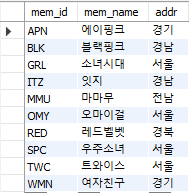

* 출력된 결과를 보면 결국 테이블의 모양을 가진다. -> SELECT문으로 실행해서 나온 결과를 mem_id, mem_name, addr 3개의 열을 가진 테이블로 봐도 됨
* 뷰는 이러한 개념을 가진다. 뷰의 실체가 SELECT문이 되는 것

In [ ]:
# 뷰를 만드는 형식
CREATE VIEW 뷰 이름
AS
SELECT 문;

* 뷰를 만든 후에 뷰에 접근하는 방식은 테이블과 동일하게 SELECT문을 사용한다.
* 전체에 접근할 수도 있고, 필요하면 조건식도 테이블과 동일하게 사용할 수 있다.

In [ ]:
SELECT 열_이름 FROM
뷰 이름
[WHERE 조건];

* 회원 테이블의 아이디, 이름, 주소에 접근하는 뷰를 생성

In [ ]:
# 회원 테이블의 아이디, 이름, 주소에 접근하는 뷰 생성
USE market_db;
CREATE VIEW v_member
AS
SELECT mem_id, mem_name, addr FROM member;

In [ ]:
# 뷰를 확인
SELECT * FROM v_member;

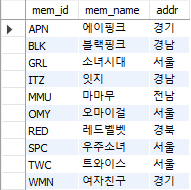

In [ ]:
# 필요한 열만 보거나 조건식 사용
SELECT mem_name, addr FROM v_member
WHERE addr IN ('서울', '경기')

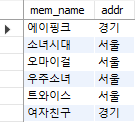

### 뷰의 작동

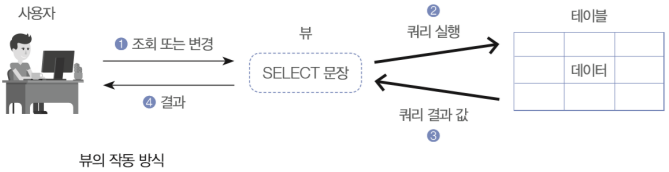

* 그림에서 사용자는 뷰를 테이블이라고 생각하고 접근한다.
* MySQL이 뷰 안에 있는 SELECT를 실행해서 그 결과를 사용자에게 보여주므로 사용자 입장에서는 1번과 4만, 즉 뷰에서 모두 처리된 것으로 이해한다.
* 뷰는 기본적으로 '읽기 전용'으로 사용되지만, 뷰를 통해서 원본 테이블의 데이터를 수정할 수도 있다. -> 몇 가지 조건을 충족해야 함

### 뷰를 사용하는 이유

### 보안(security)에 도움이 된다

* 앞의 예에서 만든 v_member 뷰에는 사용자의 아이디, 이름, 주소만 있을 뿐 사용자의 중요한 개인정보인 연락처, 평균 키, 데뷔 일자 등의 정보는 들어 있지 않다.
* 예시로 인터넷 마켓 회원의 이름과 주소를 확인하는 작업을 진행할 때, 특정 사람에게 다른 사용자의 중요한 개인정보까지 노출되는 것을 방지하고자 하는 경우
* 아이디, 이름, 주소만 보이는 뷰를 생성해서 뷰에만 접근할 수 있도록 권한을 준다면 문제를 해결할 수 있다.
* 데이터베이스도 사용자마다 테이블에 접근하는 권한에 차별을 둬서 처리하고 있으며, 사용자별 권한이 데이터베이스 보안의 중요한 주제 중 하나이다.

### 복잡한 SQL을 단순하게 만들 수 있다

In [ ]:
# 앞선 예제에서 사용되었던 물건을 구매한 회원들에 대한 SQL문
SELECT B.mem_id, M.mem_name, B.prod_name, M.addr,
CONCAT(M.phone1, M.phone2) '연락처'
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;

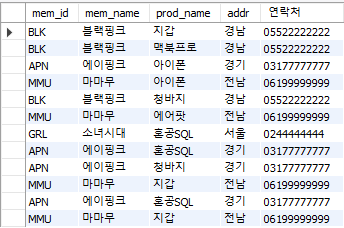

* 위의 결과를 보면, 내용이 길고 복잡하다. 이 쿼리를 자주 사용해야 한다면, 사용자들은 매번 위와 같은 복잡한 쿼리를 입력해야 할 것이다.
* 이 SQL을 다음과 같이 뷰로 생성해 놓고 사용자들은 해당 뷰에만 접근하도록 하면 복잡한 SQL을 입력할 필요가 없어진다.

In [ ]:
# 위의 SQL문을 뷰로 만들어 사용
CREATE VIEW v_memberbuy
As
SELECT B.mem_id, M.mem_name, B.prod_name, M.addr,
CONCAT(M.phone1, M.phone2) '연락처'
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;

* 이제부턴 v_memberbuy를 테이블이라 생각하고 접근하면 된다. 필요하면 WHERE절도 사용할 수 있다.
* 예를 들어 '블랙핑크'의 구매 기록을 알고 싶다면 다음과 같이 사용하면 된다.

In [ ]:
# 블랙핑크의 구매 기록 조회
SELECT * FROM v_memberbuy WHERE mem_name = '블랙핑크';

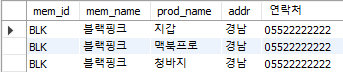

## 뷰의 실제 작동

### 뷰의 실제 생성, 수정, 삭제

* 기본적인 뷰를 생성하면서 뷰에서 사용될 열 이름을 테이블과 다르게 지정할 수 있다.
* 별칭을 사용하면 되는데, 중간에 띄어쓰기 사용이 가능하다.
* 별칭은 열 이름 뒤에 작은따옴표 또는 큰따옴표로 묶어주고, 형식상 AS를 붙여준다.
* 뷰를 조회할 때 열 이름에 공백이 있으면 백틱(`)으로 묶어줘야 한다.

In [ ]:
# 뷰 생성 예제
USE market_db;
CREATE VIEW v_viewtest1
AS
SELECT B.mem_id 'Member ID', M.mem_name AS 'Member Name',
B.prod_name "Product Name", CONCAT(M.phone1, M.phone2) AS "Officce Phone"
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;
# 백틱 사용
SELECT DISTINCT `Member ID`, `Member Name` FROM v_viewtest1;

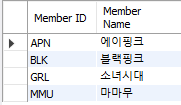

In [ ]:
# 뷰 수정 예시
ALTER VIEW v_viewtest1
AS
SELECT B.mem_id '회원 아이디', M.mem_name AS '회원 이름', B.prod_name "제품 이름",
CONCAT(M.phone1, M.phone2) AS "연락처"
FROM buy B
INNER JOIN member M
ON b.mem_id = M.mem_id;

SELECT DISTINCT `회원 아이디`, `회원 이름` FROM v_viewtest1;

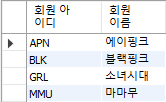

In [ ]:
# 뷰의 삭제
DROP VIEW v_viewtest1;

### 데이터베이스 개체의 생성/수정/삭제

* 데이터베이스 개체는 서로 완전히 다른 기능을 하지만 생성/수정/삭제하는 문법은 거의 동일하다.
* **생성** <br>
모든 데이터베이스 개체(테이블 뷰, 인덱스, 스토어드 프로시저, 스토어드 함수, 트리거 등)를 생성할 때는 CREATE 개체_종류를 사용한다. 예로 뷰를 생성할 때는 CREATE VIEW를 사용한다.
* **수정** <br>
이미 생성된 데이터베이스 개체를 수정할 때는 ALTER 개체_종류를 사용한다. 예로 테이블을 수정할 때는 ALTER TABLE을 사용한다.
* **삭제** <br>
기존의 데이터베이스 개체를 삭제할 때는 DROP 개체_종류를 사용한다. 예로 스토어드 프로시저를 삭제할 때는 DROP PROCEDURE를 사용한다.

### 뷰의 정보 확인

* 기존에 생성된 뷰에 대한 정보를 확인할 수 있다.

In [ ]:
# 기존에 생성된 뷰에 대한 정보를 확인
USE market_db;
CREATE OR REPLACE VIEW v_viewtest2
AS
SELECT mem_id, mem_name, addr FROM member;

* 뷰를 생성할 때 CREATE VIEW는 기존에 뷰가 있으면 오류가 발생하지만, CREATE OR REPLACE VIEW는 기존에 뷰가 있어도 덮어쓰는 효과를 내기 때문에 오류가 발생하지 않는다. 즉, DROP VIEW와 CREATE VIEW를 연속으로 작성한 효과를 갖는다.

In [ ]:
# 뷰의 정보 확인
DESCRIBE v_viewtest2;

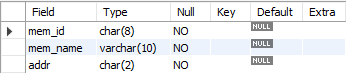

* 뷰도 테이블과 동일하게 정보를 보여준다. 단, PRIMARY KEY 등의 정보는 확인되지 않는다.

In [ ]:
# 테이블 정보 확인
DESCRIBE member;

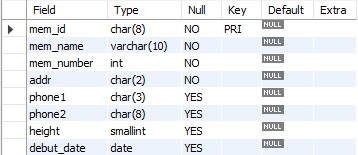

* SHOW CREATE VIEW 문으로 뷰의 소스 코드도 확인할 수 있다.

In [ ]:
# 뷰의 소스코드 확인
SHOW CREATE VIEW v_viewtest2;

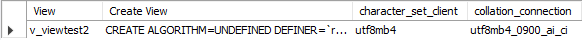

### 뷰를 통한 데이터의 수정/삭제

In [ ]:
# 뷰를 통한 데이터 수정
# 오류 없이 수정되는 것을 볼 수 있음
UPDATE v_member SET addr = '부산' WHERE mem_id = 'BLK';

In [ ]:
# 데이터 입력
INSERT INTO v_member(mem_id, mem_name, addr) VALUES('BTS', '방탄소년단', '경기');

* v_member(뷰)가 참조하는 member(테이블)의 열 중에서 mem_number 열은 NOT NULL로 설정되어서 반드시 입력해줘야 한다.
* 하지만 현재의 v_member에서는 mem_number 열을 참조하고 있지 않으므로 값을 입력할 방법이 없다.
* 뷰를 통해서 데이터를 입력하려면, 뷰에서 보이지 않는 테이블의 열에 NOT NULL이 없어야 한다.
* 만약 v_member 뷰를 통해서 member 테이블에 값을 입력하고 싶다면 v_member에 mem_number 열을 포함하도록 뷰를 재정의하거나, member에서 mem_number 열의 속성을 NULL로 바꾸거나, 기본값을 지정해야 한다.

In [ ]:
# 지정한 범위로 뷰를 생성, 평균 키가 167 이상인 뷰를 생성
CREATE VIEW v_height167
AS
# 평균 키가 167이상만 조회
SELECT * FROM member WHERE height >= 167;
SELECT * FROM v_height167;

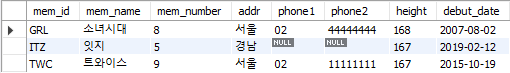

In [ ]:
# 뷰에서 키가 167미만인 데이터 삭제
# 뷰에는 167미만인 데이터가 없으므로 삭제될 데이터도 없는 것이다
DELETE FROM v_height167 WHERE height < 167;

### 뷰를 통한 데이터의 입력

In [ ]:
# 뷰에서 키가 167미만인 데이터 입력
INSERT INTO v_height167 VALUES('TRA', '티아라', 6, '서울', NULL, NULL, 159, '2005-01-01');

* v_height167 뷰는 167 이상만 보이도록 만든 뷰인데, 167 미만인 데이터가 입력되었다.
* 167이상만 조회가 되므로 방금 전에 입력한 티아라 데이터는 보이지 않는다.

In [ ]:
SELECT * FROM v_height167;

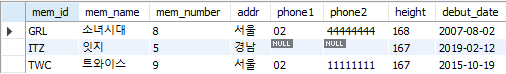

* 키가 167이상인 뷰에 키가 159인 데이터를 입력한 것은 바람직해 보이지 않는다.
* 즉, 예상치 못한 경로를 통해서 입력되면 안 되는 데이터가 입력되는 느낌임
* 키가 167이상인 뷰이므로 167이상의 데이터만 입력되도록 하는 것이 논리적으로 바람직하다.
* 에약어 WITH CHECK OPTION을 통해 뷰에 설정된 값의 범위가 벗어나는 값은 입력되지 않도록 할 수 있다.

In [ ]:
# WITH CHECK OPTION 사용 예시
ALTER VIEW v_height167
AS
SELECT * FROM member WHERE height >= 167
WITH CHECK OPTION;
INSERT INTO v_height167 VALUES('TOP', '텔레토비', 4, '영국', NULL, NULL, 140, '1995-01-01');

* 키가 167미만인 데이터는 입력되지 않고, 167이상의 데이터만 입력된다.

### 단순 뷰와 복합 뷰

* 하나의 테이블로 만든 뷰를 단순 뷰라 하고, 두 개 이상의 테이블로 만든 뷰를 복합 뷰라고 한다.
* 복합 뷰는 주로 두 테이블을 조인한 결과를 뷰로 만들 때 사용

In [ ]:
# 복합 뷰의 예시
CREATE VIEW v_complex
AS
SELECT B.mem_id, M.mem_name, B.prod_name, M.addr
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;

### 뷰가 참조하는 테이블의 삭제

In [ ]:
# 뷰가 참조하는 테이블 삭제
DROP TABLE IF EXISTS buy, member;

In [ ]:
# 여러 개의 뷰가 두 테이블과 관련이 있는데도 테이블이 삭제되었다
# 두 테이블 중 아무거나 연관되는 뷰 조회
SELECT * FROM v_height167;

* 당연히 참조하는 테이블이 없기 때문에 조회할 수 없다는 메시지가 나온다.
* 뷰가 조회되지 않으면 CHECK TABLE문으로 뷰의 상태를 확인할 수 있다. 뷰가 참조하는 테이블이 없어서 오류가 발생하는 것을 확인할 수 있다.

In [ ]:
# CHECK TABLE문으로 뷰의 상태 확인
CHECK TABLE v_height167;

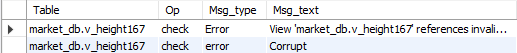